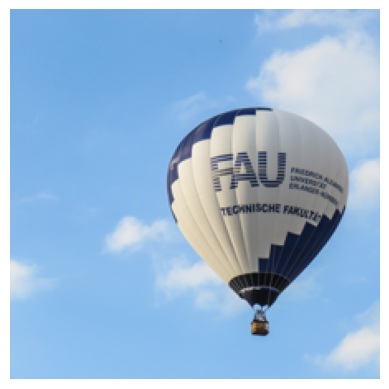

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# 读取图像文件
image_path = './1.png'
image = Image.open(image_path)

# 裁剪图像为224x224大小
image = image.resize((224, 224))

# 显示图像
plt.imshow(image)
plt.axis('off')
plt.show()


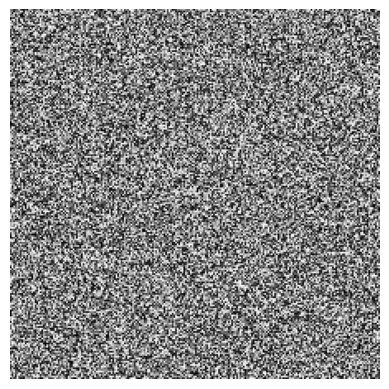

In [2]:
import numpy as np

# 创建随机噪声图像
noise_image = np.random.rand(224, 224)

# 显示噪声图像
plt.imshow(noise_image, cmap='gray')
plt.axis('off')
plt.show()


In [3]:
from PIL import Image
import numpy as np

# 创建随机噪声图像
noise_image = np.random.rand(224, 224) * 255  # 将数值范围映射到0-255之间

# 将NumPy数组转换为PIL图像
pil_image = Image.fromarray(noise_image.astype(np.uint8))

# # 保存图像
# save_path = './noise_image.jpg'
# pil_image.save(save_path, "JPEG")

# print("噪声图像已保存到：", save_path)


In [14]:
from PIL import Image
import numpy as np

# 读取图像文件
image_path = './1.png'
image = Image.open(image_path)

# 将图像转换为NumPy数组
image_array = np.array(image)

# 添加噪声
noise = np.random.normal(loc=0, scale=20, size=image_array.shape).astype(np.uint8)
noisy_image_array = np.clip(image_array + noise, 0, 255)

# 创建带噪声的图像
noisy_image = Image.fromarray(noisy_image_array)

# # 保存为JPEG格式
# save_path = './noisy_image.jpg'
# noisy_image.save(save_path, "JPEG")

# print("带噪声的图像已保存到：", save_path)

In [15]:
print(noisy_image_array.shape)

(299, 299, 3)


In [10]:
# 将图像分割为16个块
patch_size = 299 // 4  # 每个块的大小为224/4=56
patches = []
for i in range(4):
    for j in range(4):
        patch = noisy_image_array[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size]
        patches.append(patch)

# 显示并保存每个块
for i, patch in enumerate(patches):
    patch_image = Image.fromarray(patch)
    patch_image.show()
    patch_image.save(f'./patch/patch_{i}.jpg')

print("每个块的图像已保存")


每个块的图像已保存


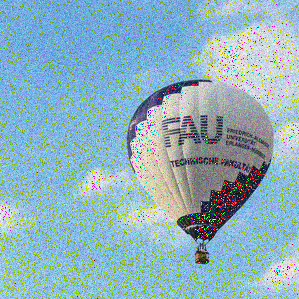

In [16]:
noisy_image

In [17]:
noisy_image_array

array([[[116, 171, 214],
        [132, 148,   9],
        [123, 157, 252],
        ...,
        [148, 210, 231],
        [148, 219, 239],
        [168, 187, 228]],

       [[ 90, 175, 233],
        [132, 169, 217],
        [ 89, 158, 212],
        ...,
        [129, 206, 220],
        [173, 217, 234],
        [170, 186, 246]],

       [[ 83, 198, 228],
        [125, 174, 202],
        [111, 202, 227],
        ...,
        [139, 172, 229],
        [165, 193, 226],
        [149, 205, 220]],

       ...,

       [[179, 203, 244],
        [144, 226, 230],
        [143, 178, 229],
        ...,
        [156, 218, 211],
        [153, 182, 209],
        [172, 188, 245]],

       [[138, 207, 238],
        [152, 204, 239],
        [162, 211, 233],
        ...,
        [166, 196, 222],
        [188, 187, 205],
        [134, 177, 246]],

       [[165, 162, 224],
        [148, 201, 240],
        [153, 207, 242],
        ...,
        [159, 220, 217],
        [169, 206, 247],
        [151, 200,   0]]

In [6]:
import os
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import argparse
import skimage.data
import skimage.io
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt

# 定义是否使用GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load training and testing datasets.
pic_dir = '1.png'

# 定义数据预处理方式(将输入的类似numpy中arrary形式的数据转化为pytorch中的张量（tensor）)
transform = transforms.ToTensor()


# 单张图像送入
# 构建网络
# 提取中间层
# 可视化特征图

def get_picture(picture_dir, transform):
    '''
    该算法实现了读取图片，并将其类型转化为Tensor
    '''
    img = skimage.io.imread(picture_dir)
    img256 = skimage.transform.resize(img, (256, 256))
    img256 = np.asarray(img256)
    img256 = img256.astype(np.float32)

    return transform(img256)


def get_picture_rgb(picture_dir):
    '''
    该函数实现了显示图片的RGB三通道颜色
    '''
    img = skimage.io.imread(picture_dir)
    img256 = skimage.transform.resize(img, (256, 256))
    skimage.io.imsave('new4.jpg', img256)

    # 取单一通道值显示
    # for i in range(3):
    #     img = img256[:,:,i]
    #     ax = plt.subplot(1, 3, i + 1)
    #     ax.set_title('Feature {}'.format(i))
    #     ax.axis('off')
    #     plt.imshow(img)

    # r = img256.copy()
    # r[:,:,0:2]=0
    # ax = plt.subplot(1, 4, 1)
    # ax.set_title('B Channel')
    # # ax.axis('off')
    # plt.imshow(r)

    # g = img256.copy()
    # g[:,:,0]=0
    # g[:,:,2]=0
    # ax = plt.subplot(1, 4, 2)
    # ax.set_title('G Channel')
    # # ax.axis('off')
    # plt.imshow(g)

    # b = img256.copy()
    # b[:,:,1:3]=0
    # ax = plt.subplot(1, 4, 3)
    # ax.set_title('R Channel')
    # # ax.axis('off')
    # plt.imshow(b)

    # img = img256.copy()
    # ax = plt.subplot(1, 4, 4)
    # ax.set_title('image')
    # # ax.axis('off')
    # plt.imshow(img)

    img = img256.copy()
    ax = plt.subplot()
    ax.set_title('new-image')
    # ax.axis('off')
    plt.imshow(img)

    plt.show()


class LeNet(nn.Module):
    '''
    该类继承了torch.nn.Modul类
    构建LeNet神经网络模型
    '''
    def __init__(self):
        super(LeNet, self).__init__()

        # 第一层神经网络，包括卷积层、线性激活函数、池化层
        self.conv1 = nn.Sequential( 
            nn.Conv2d(3, 32, 5, 1, 2),   # input_size=(3*256*256)，padding=2
            nn.ReLU(),                  # input_size=(32*256*256)
            nn.MaxPool2d(kernel_size=2, stride=2),  # output_size=(32*128*128)
        )

        # 第二层神经网络，包括卷积层、线性激活函数、池化层
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 5, 1, 2),  # input_size=(32*128*128)
            nn.ReLU(),            # input_size=(64*128*128)
            nn.MaxPool2d(2, 2)    # output_size=(64*64*64)
        )

        # 全连接层(将神经网络的神经元的多维输出转化为一维)
        self.fc1 = nn.Sequential(
            nn.Linear(64 * 64 * 64, 128),  # 进行线性变换
            nn.ReLU()                    # 进行ReLu激活
        )

        # 输出层(将全连接层的一维输出进行处理)
        self.fc2 = nn.Sequential(
            nn.Linear(128, 84),
            nn.ReLU()
        )

        # 将输出层的数据进行分类(输出预测值)
        self.fc3 = nn.Linear(84, 62)

    # 定义前向传播过程，输入为x
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # nn.Linear()的输入输出都是维度为一的值，所以要把多维度的tensor展平成一维
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# 中间特征提取
class FeatureExtractor(nn.Module):
    def __init__(self, submodule, extracted_layers):
        super(FeatureExtractor, self).__init__()
        self.submodule = submodule
        self.extracted_layers = extracted_layers
 
    def forward(self, x):
        outputs = []
        print('---------',self.submodule._modules.items())
        for name, module in self.submodule._modules.items():
            if "fc" in name:
                x = x.view(x.size(0), -1)
            print(module)
            x = module(x)
            print('name', name)
            if name in self.extracted_layers:
                outputs.append(x)
        return outputs


def get_feature():  # 特征可视化
    # 输入数据
    img = get_picture(pic_dir, transform) # 输入的图像是【3,256,256】
    # 插入维度
    img = img.unsqueeze(0)  # 【1,3,256,256】
    img = img.to(device)

    # 特征输出
    net = LeNet().to(device)
    # net.load_state_dict(torch.load('./model/net_050.pth'))
    exact_list = ['conv1']
    myexactor = FeatureExtractor(net, exact_list)  # 输出是一个网络
    x = myexactor(img)
    folder_path = "./feature1"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    # 特征输出可视化
    for i in range(32):  # 可视化了32通道
        plt.axis('off')
        plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
        plt.margins(0, 0)
        plt.imshow(x[0].data.cpu().numpy()[0,i,:,:],cmap='jet')
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.savefig(os.path.join(folder_path, f"feature_{i}.jpeg"))
        plt.close()
    # plt.show()  # 图像每次都不一样，是因为模型每次都需要前向传播一次，不是加载的与训练模型

# 训练
if __name__ == "__main__":
    #get_picture_rgb(pic_dir)
    get_feature()
    


--------- odict_items([('conv1', Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)), ('conv2', Sequential(
  (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)), ('fc1', Sequential(
  (0): Linear(in_features=262144, out_features=128, bias=True)
  (1): ReLU()
)), ('fc2', Sequential(
  (0): Linear(in_features=128, out_features=84, bias=True)
  (1): ReLU()
)), ('fc3', Linear(in_features=84, out_features=62, bias=True))])
Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
name conv1
Sequential(
  (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stri